In [26]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from python.radial import RadialEquation
from python.plot import AnimationWF

sp.show_config()
np.show_config()

gx = np.sin(np.linspace(0, np.pi/2, 200))
uniform = 100 * np.linspace(0, 1, 50)

lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas'

In [27]:
h = RadialEquation(gx)
h.init_hamiltonian()
p = np.diag(h.p)[::2]

reduced mass: 1.9989112683723462
laplace is ready
potential is ready
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.99993769 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.01183999 0.         0.        ]
 [0.         0.         0.         ... 0.         0.00394674 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00394674]]
[[ 1.87144388e+005 -7.55997831e+004  2.03548066e+004 ... -2.54855734e-220
   1.17578772e-220 -3.15051370e-221]
 [-7.55997831e+004  1.15254744e+005 -7.59651725e+004 ...  9.51134548e-220
  -4.38809951e-220  1.17578772e-220]
 [ 2.03548066e+004 -7.59651725e+004  1.12647726e+005 ... -2.61689762e-219
   1.20731680e-219 -3.23499561e-220]
 ...
 [-2.54855734e-220  9.51134548e-220 -2.61689762e-219 ...  1.25795579e+007
  -9.55808265e+006  2.56108053e+006]
 [ 1.17578772e-220 -4.38809951e-220  1

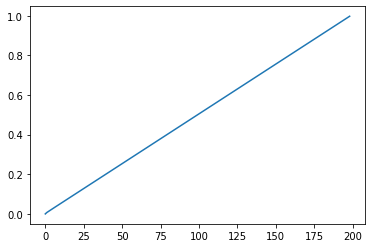

In [30]:
plt.plot(2/np.pi * np.arccos(p))

In [4]:
evals, evecs= h.eigs()
print(evals)

[-0.15663347 -0.01988925 -0.00497668  0.63458767]


/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/venv/lib/python3.7/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:1595: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  RuntimeWarning)


In [18]:
h.init_default()


reduced mass: 1.9989112683723462
laplace is ready
potential is ready


In [19]:
h.ident.toarray()

array([[  1.6430732 ,   0.11509982,  -0.44026014,   0.        ],
       [  0.44026014,   0.88490018,  -1.6430732 ,   0.        ],
       [  0.        ,   0.88490018,  11.50151238,  -3.08182095],
       [  0.        ,   0.11509982,   3.08182095, -11.50151238]])

In [20]:
h.ddx.toarray()

array([[-0.21856406,  0.02217025, -0.05856406,  0.        ],
       [ 0.05856406, -0.02217025,  0.21856406,  0.        ],
       [ 0.        , -0.00045245, -0.03122344, -0.00836629],
       [ 0.        ,  0.00045245,  0.00836629,  0.03122344]])

In [21]:
ident_inv = sp.sparse.linalg.inv(h.ident).toarray()
ident_inv

array([[ 0.63373067, -0.09373067,  0.01170879, -0.00313736],
       [-0.27451905,  1.02451905,  0.14635986, -0.03921701],
       [ 0.02196152, -0.08196152,  0.08196152, -0.02196152],
       [ 0.00313736, -0.01170879,  0.0234262 , -0.09322212]])

In [42]:
row = h.ddx @ ident_inv[0, :]
col = h.ddx @ ident_inv[:, 0]

ddx_new = h.ddx @ ident_inv

diag = np.zeros(ddx_new.shape[0])
diag[0] = diag[1] = 1
for i in range(2, ddx_new.shape[0]):
    diag[i] = col[i]/row[i]
p = np.diag(diag)

print((p @ h.ddx @ ident_inv))

[[-0.14588306  0.048      -0.00411429  0.00110242]
 [ 0.048      -0.04611694  0.01535472 -0.00411429]
 [-0.00116342  0.00434194 -0.00558462  0.00293625]
 [-0.00058485  0.00218267 -0.00550866  0.01155738]]


In [43]:
print((p @ h.ddx @ ident_inv))

[[-0.14588306  0.048      -0.00411429  0.00110242]
 [ 0.048      -0.04611694  0.01535472 -0.00411429]
 [-0.00116342  0.00434194 -0.00558462  0.00293625]
 [-0.00058485  0.00218267 -0.00550866  0.01155738]]


In [2]:
h_uniform = RadialEquation(uniform)
print(h.ident.shape)
h.init_default()
print("default collocation")
evals, evecs = h.exp_hamiltonian(dt=0.01, k=3, which='LM')
print(evals)
#print(h.h[3, :20].toarray())
#print(h.h[:20, 3].toarray())

print("modified")
h.init_hamiltonian()
evals, evecs = h.eigs(k=5, sigma=-0.6)
print(evals)

reduced mass: 1.9989112683723462
laplace is ready
potential is ready
reduced mass: 1.9989112683723462
laplace is ready
potential is ready
(398, 398)
default collocation


/Users/Aleksei_Kornev2/physics/Faddeev/TDFE/python/radial.py:125: ComplexWarning: Casting complex values to real discards the imaginary part
  evecs[:, i] = evecs[:, i] / math.sqrt(norm)


[-0.12493197+0.j -0.03123299+0.j -0.01388133+0.j]
modified
[-0.12493195 -0.03123299 -0.01388133 -0.00779674 -0.00446153]


In [3]:
s_inv = sp.sparse.linalg.inv(h.ident)

In [4]:
ddx_new = (h.ddx @ s_inv).toarray()

In [51]:
fixed = p @ ddx_new

In [53]:
print(fixed[:, 3])
print(fixed[3, :20])

[  145461.7331  -542870.5786  1551569.8426 -1949392.2895   996546.9348
  -177050.3315    48584.9399    -8890.7632     2635.1285     -490.9265
      151.8979      -28.639         9.1068       -1.7317        0.5612
       -0.1074        0.0353       -0.0068        0.0023       -0.0004]
[  145461.7331  -542870.5786  1551569.8426 -1949392.2895   996546.9348
  -177050.3315    48584.9399    -8890.7632     2635.1285     -490.9265
      151.8979      -28.639         9.1068       -1.7317        0.5612
       -0.1074        0.0353       -0.0068        0.0023       -0.0004]


In [5]:
diagonal = [1, 1]
for i in range(2, ddx_new.shape[0]):
    diagonal.append(ddx_new[0][i]/ddx_new[i][0])
diagonal = np.array(diagonal)
p = np.diag(diagonal)

In [6]:
delta = (diagonal[2]+ (pow - 1))/pow - (diagonal[0]+ (pow - 1))/pow
print(f"pow {pow}, delta {delta}")
acc = np.zeros_like(diagonal[::2])
for i , d in enumerate(diagonal[::2]):
    acc[i] = (d+(pow - 1))/pow
    if i > 1:
        print((acc[i] - acc[i-1])/(pow-1))

pow 3, delta -1.3265339363410789e-05
-1.3265075408830374e-05
-1.9896953239895154e-05
-2.65280392505729e-05
-3.315806955078715e-05
-3.9786780292538904e-05
-4.641390767917697e-05
-5.3039187975501e-05
-5.966235752502547e-05
-6.628315274964658e-05
-7.290131016779444e-05
-7.951656640570182e-05
-8.612865819646043e-05
-9.273732241893429e-05
-9.934229605584877e-05
-0.00010594331627178377
-0.00011254012036143735
-0.00011913244580424864
-0.00012572003024696743
-0.00013230261153751588
-0.00013887992770872382
-0.0001454517170116909
-0.0001520177179153981
-0.00015857766912025228
-0.00016513130956291588
-0.00017167837844295208
-0.00017821861519756732
-0.00018475175956988998
-0.00019127755155501358
-0.00019779573145395357
-0.00020430603986920648
-0.00021080821771746194
-0.00021730200624614504
-0.0002237871470075481
-0.00023026338194587215
-0.00023673045331262799
-0.00024318810374479582
-0.00024963607625894113
-0.00025607411425376814
-0.0002625019615174473
-0.0002689193622550379
-0.0002753260610637853

In [32]:
h.v

<98x98 sparse matrix of type '<class 'numpy.float64'>'
	with 388 stored elements in Compressed Sparse Column format>

In [33]:
v = np.array([h.lv(x) for x in h.spl_x.collocPoints])

In [34]:
len(diagonal[::2])

49

[]

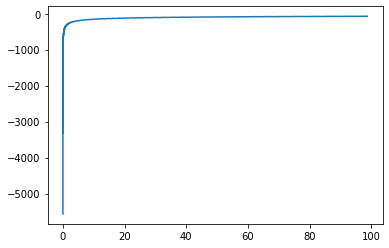

In [40]:
plt.plot(h.spl_x.collocPoints, -v@p)
plt.plot()

In [41]:
np.linspace(1, 19, 19)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.])

In [42]:
np.set_printoptions(precision=4,suppress=True)
h.h.todense()

matrix([[    1607.3686, -2399327.8156,      431.0264, ...,        0.    ,
                0.    ,        0.    ],
        [    -430.9044,  2397366.9989,    -1607.8239, ...,        0.    ,
                0.    ,        0.    ],
        [       0.    ,    48532.8848,      229.3418, ...,        0.    ,
                0.    ,        0.    ],
        ...,
        [       0.    ,        0.    ,        0.    , ...,        0.0428,
               -0.2294,        0.    ],
        [       0.    ,        0.    ,        0.    , ...,        0.0389,
                0.2196,        0.0633],
        [       0.    ,        0.    ,        0.    , ...,       -0.0493,
               -0.0632,       -0.2199]])

In [43]:
t = np.linspace(0, 40, 100)

x = [h.splinef(evecs[:, 0], ti) for ti in t]
plt.plot(t, x)
plt.show()

ValueError: shapes (38,) and (98,) not aligned: 38 (dim 0) != 98 (dim 0)